In [552]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from outliers import smirnov_grubbs as grubbs

In [553]:
def series(nums):

    med = np.median(nums)
    nums = nums[nums != med]
    size = len(nums)

    sign = nums > med  # True is +; False is -

    nps, nms = 0, 0
    previous_s = sign[0]

    for s in sign[1:]:

        if s != previous_s and previous_s:
            nms += 1
        elif s != previous_s and not previous_s:
            nps += 1
        previous_s = s


    r = nms + nps
    n_m = sum(1 for s in sign if not s)
    n_p = sum(1 for s in sign if s)

    mu = 2*n_p*n_m / size + 1
    sigma_sq = 2*n_p*n_m*(2*n_p*n_m - size) / ((size**2)*(size - 1))
    sigma = sigma_sq**0.5

    return (r - mu) / sigma

In [569]:
def get_info(df):
    columns = ['count', 'nunique', 'mean',  'range',  'std', 'varience', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt', 'sem', 'sum']
    info = df.describe().T
    info['nunique'] = df.nunique()
    info['range'] = df.max(0) - df.min(0)
    info['varience'] = df.var()
    info['skew'] = df.skew()
    info['kurt'] = df.kurtosis()
    info['sem'] = df.sem()
    info['sum'] = df.sum()
    mode = df.mode(axis=0).T
    mode_names = [f'mode{i + 1}' for i in range(len(mode.T))]
    mode.columns = [f'mode{i + 1}' for i in range(len(mode.T))]
    columns = columns + mode_names
    info = pd.concat([info, mode], axis=1)
    return info[columns]

In [555]:
plt.style.use('ggplot')

In [556]:
names = [f'var{i + 1}' for i in range(7)]

In [557]:
df = pd.read_excel('data1.xlsx', sheet_name='2',
                   header=None, names=names)

In [558]:
df

,var1,var2,var3,var4,var5,var6,var7
0,-16.427992,10.337568,10.094972,12.235925,10,16,-2.336080
1,-29.368694,20.601542,15.573639,12.159321,6,15,5.041232
2,-6.561724,1.876631,2.625150,24.552468,10,14,6.987623
3,7.358867,17.243398,15.855155,12.348476,9,14,9.542421
4,6.692038,-23.179041,11.742064,19.597243,9,15,11.116361
...,...,...,...,...,...,...,...
495,-14.625446,28.472332,3.514818,14.900529,8,9,11.921887
496,-8.260384,29.031223,15.098677,11.791395,9,12,12.517533
497,-26.231086,-10.672482,2.563150,13.363092,10,11,12.910253
498,2.804773,-34.769869,20.353306,2.508352,7,13,13.257425


In [570]:
get_info(df).T

,var1,var2,var3,var4,var5,var6,var7
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000
nunique,498.000000,497.000000,498.000000,495.000000,10.000000,20.000000,494.000000
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.086172,7.921503
range,45.765557,112.458074,80.036116,42.804531,9.000000,20.000000,26.375637
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.313988,3.833575
varience,184.539975,335.889412,179.844218,48.881130,2.647631,10.982519,14.696298
min,-33.870846,-49.504520,-28.674916,-7.461513,3.000000,3.000000,-5.948884
25%,-22.278191,-3.051858,-0.717933,7.874639,7.000000,10.000000,5.430496
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
75%,1.684851,20.505862,18.168010,17.091330,10.000000,14.000000,10.567242


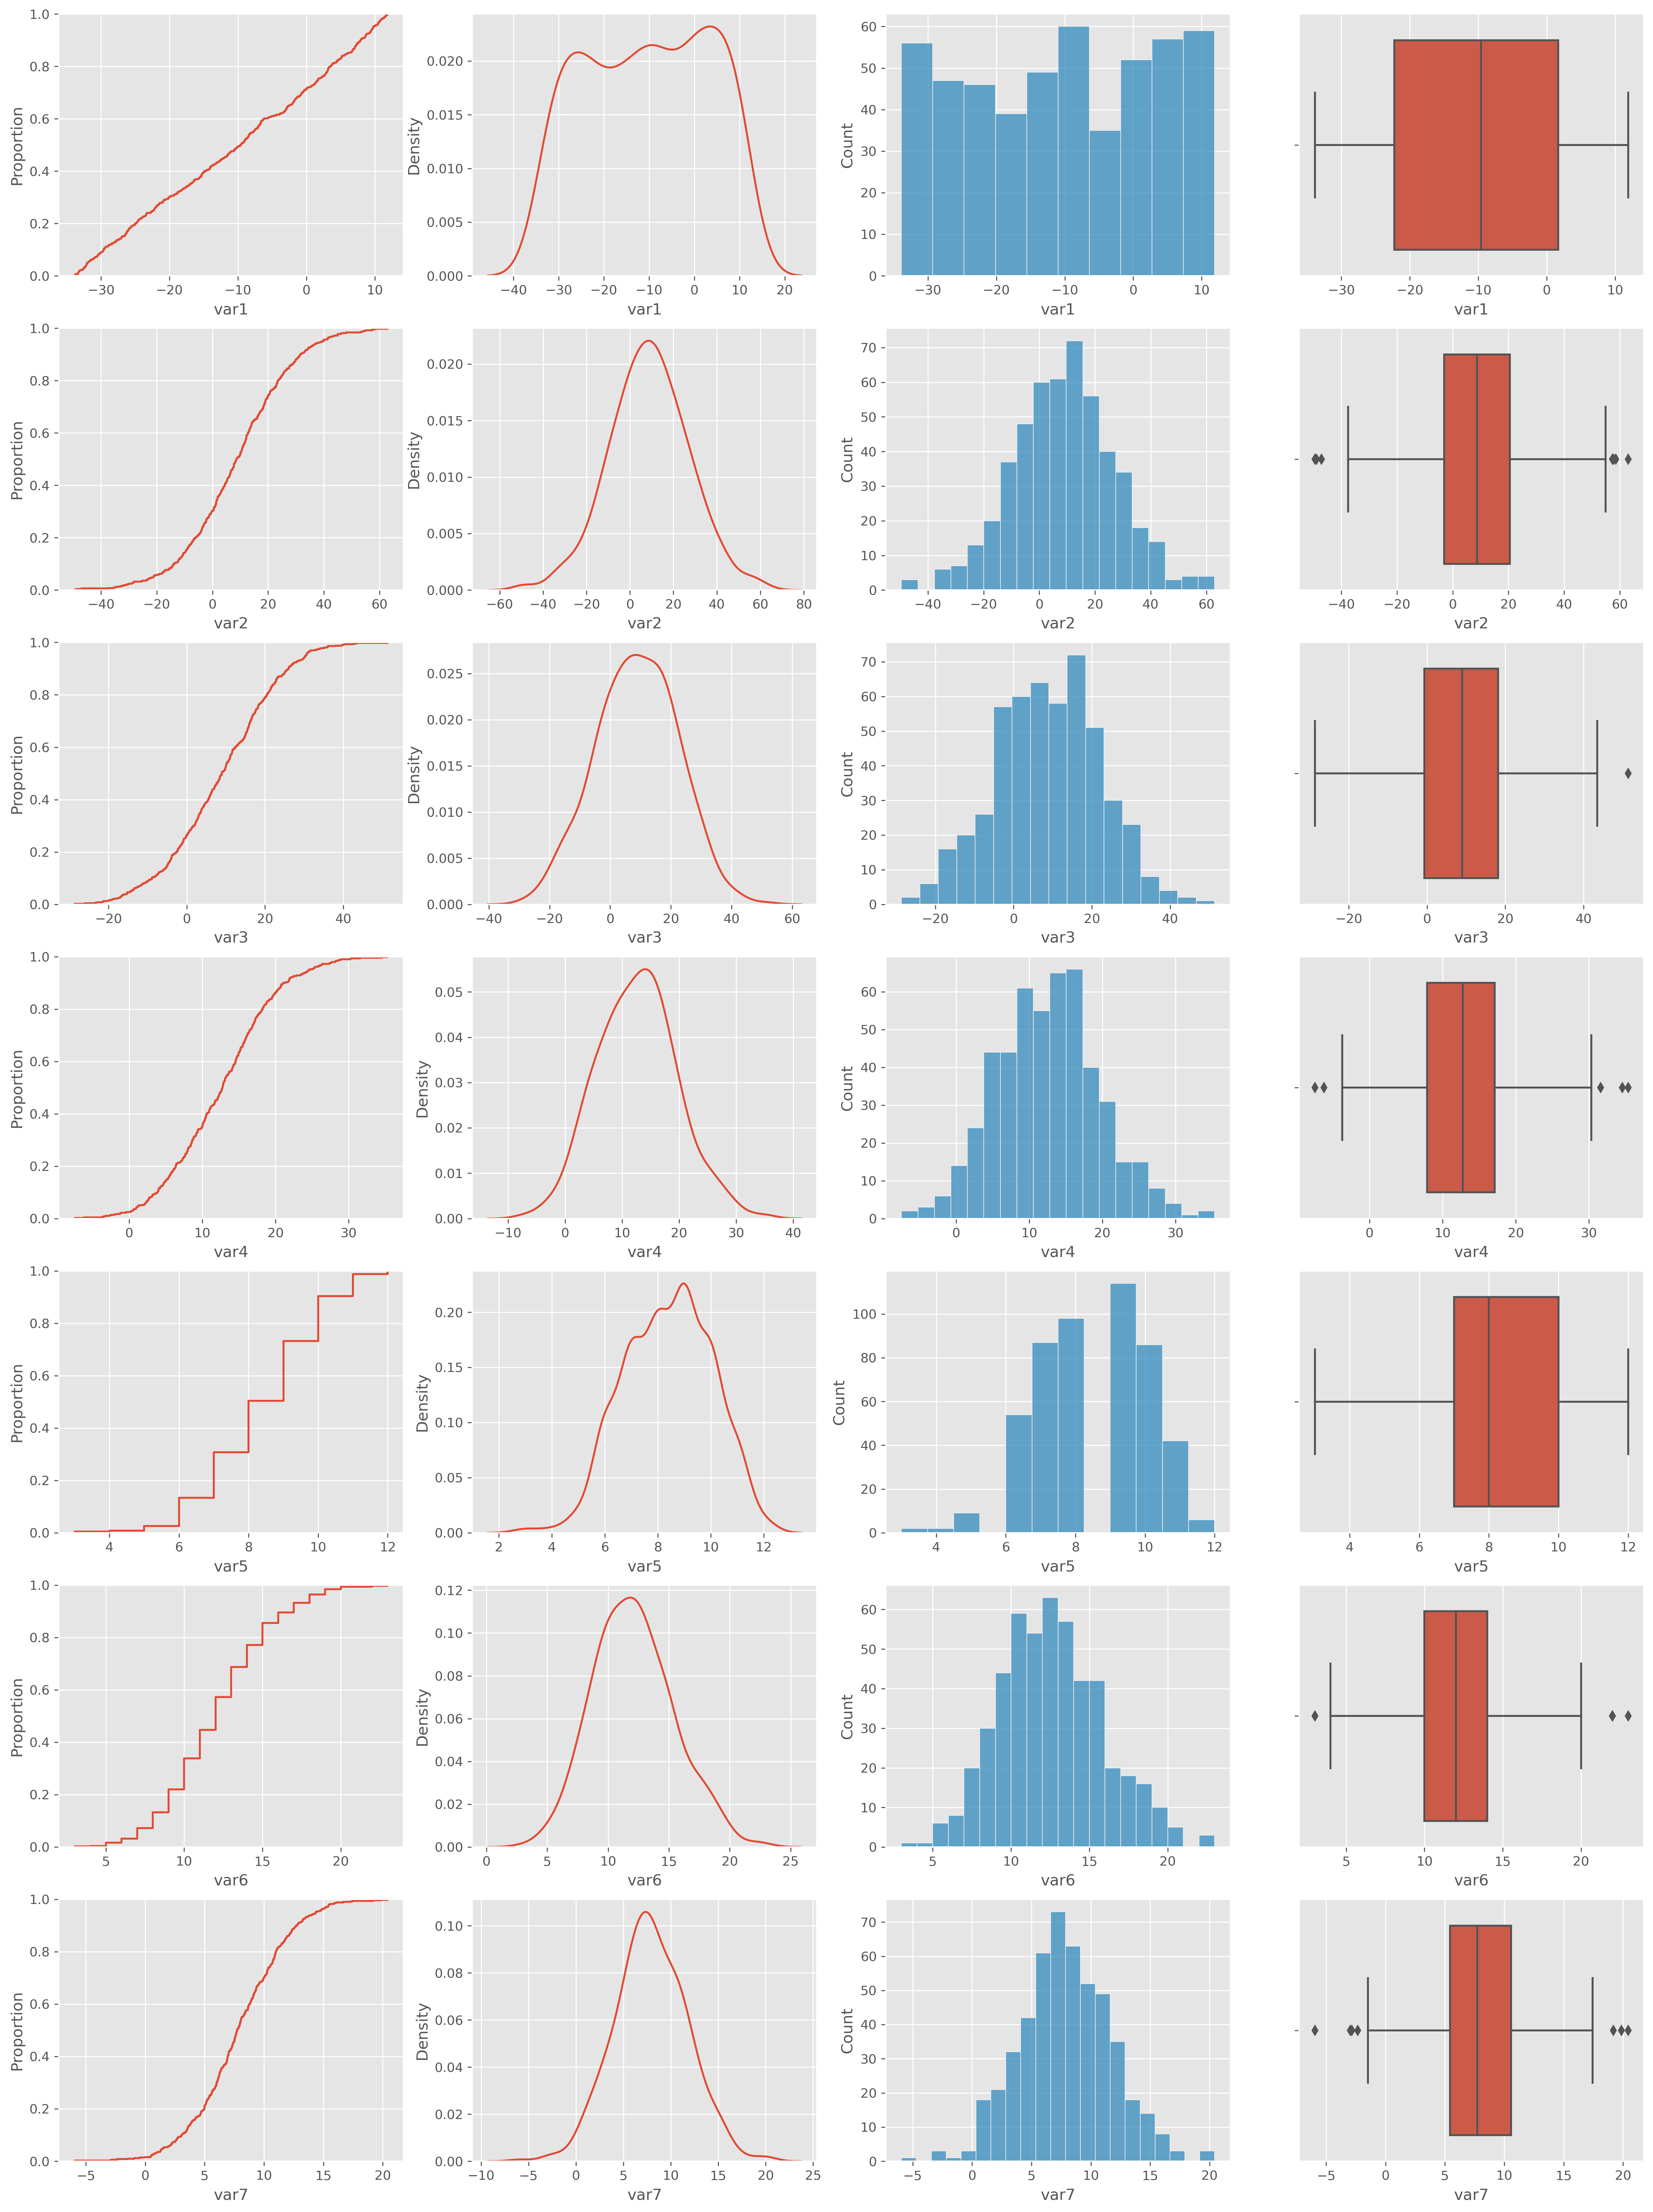

In [578]:
fig, axs = plt.subplots(7, 4, sharex=False,
                            figsize=(22, 30), dpi=300)

for var, ax in zip(names, axs):
    sns.ecdfplot(data=df, x=var, ax=ax[0])
    sns.kdeplot(data=df, x=var, ax=ax[1])
    sns.histplot(data=df, x=var, ax=ax[2])
    sns.boxplot(data=df, x=var, ax=ax[3])

In [561]:
for name in names:
    all_values = df[name].values
    non_outliers = grubbs.test(all_values, alpha=.1)
    print(name)
    print('series method |z| < 2.8')
    print('series method', series(all_values))
    print('outlier_values', set(all_values) - set(non_outliers))
    print()

var1
series method |z| < 2.8
series method -1.5220520918421698
outlier_values set()

var2
series method |z| < 2.8
series method -0.9848572358978746
outlier_values set()

var3
series method |z| < 2.8
series method -1.432519615851454
outlier_values set()

var4
series method |z| < 2.8
series method 0.9848572358978746
outlier_values set()

var5
series method |z| < 2.8
series method 1.4782944254798134
outlier_values set()

var6
series method |z| < 2.8
series method -0.8056200721503368
outlier_values {26}

var7
series method |z| < 2.8
series method -6.983533127275838
outlier_values set()



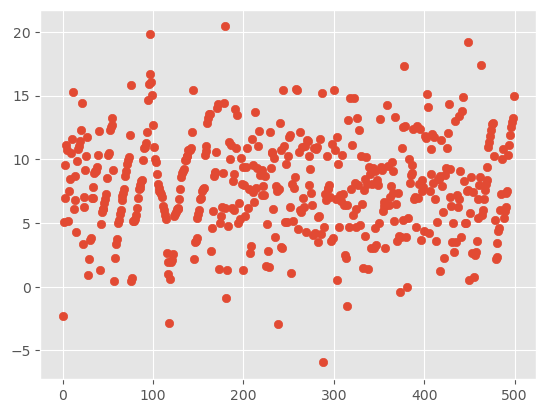

In [562]:
plt.scatter(range(500), df['var7'].values)

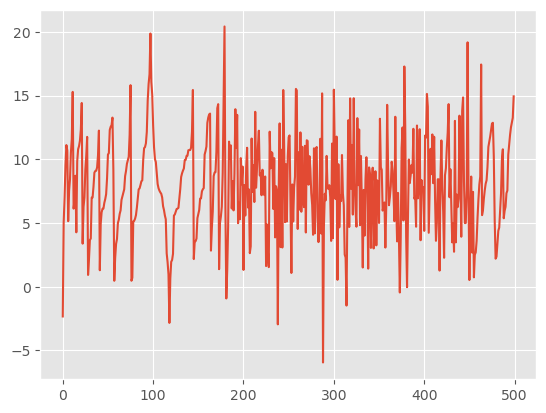

In [563]:
plt.plot(range(500), df['var7'].values)

In [564]:
df['var6'].replace(26, np.nan, inplace=True)
df

,var1,var2,var3,var4,var5,var6,var7
0,-16.427992,10.337568,10.094972,12.235925,10,16.0,-2.336080
1,-29.368694,20.601542,15.573639,12.159321,6,15.0,5.041232
2,-6.561724,1.876631,2.625150,24.552468,10,14.0,6.987623
3,7.358867,17.243398,15.855155,12.348476,9,14.0,9.542421
4,6.692038,-23.179041,11.742064,19.597243,9,15.0,11.116361
...,...,...,...,...,...,...,...
495,-14.625446,28.472332,3.514818,14.900529,8,9.0,11.921887
496,-8.260384,29.031223,15.098677,11.791395,9,12.0,12.517533
497,-26.231086,-10.672482,2.563150,13.363092,10,11.0,12.910253
498,2.804773,-34.769869,20.353306,2.508352,7,13.0,13.257425


In [571]:
get_info(pd.DataFrame(df['var6']))

,count,nunique,mean,range,std,varience,min,25%,50%,75%,max,skew,kurt,sem,sum,mode1
var6,499.0,20,12.086172,20.0,3.313988,10.982519,3.0,10.0,12.0,14.0,23.0,0.291304,-0.010696,0.148354,6031.0,12.0


<AxesSubplot:xlabel='var6'>

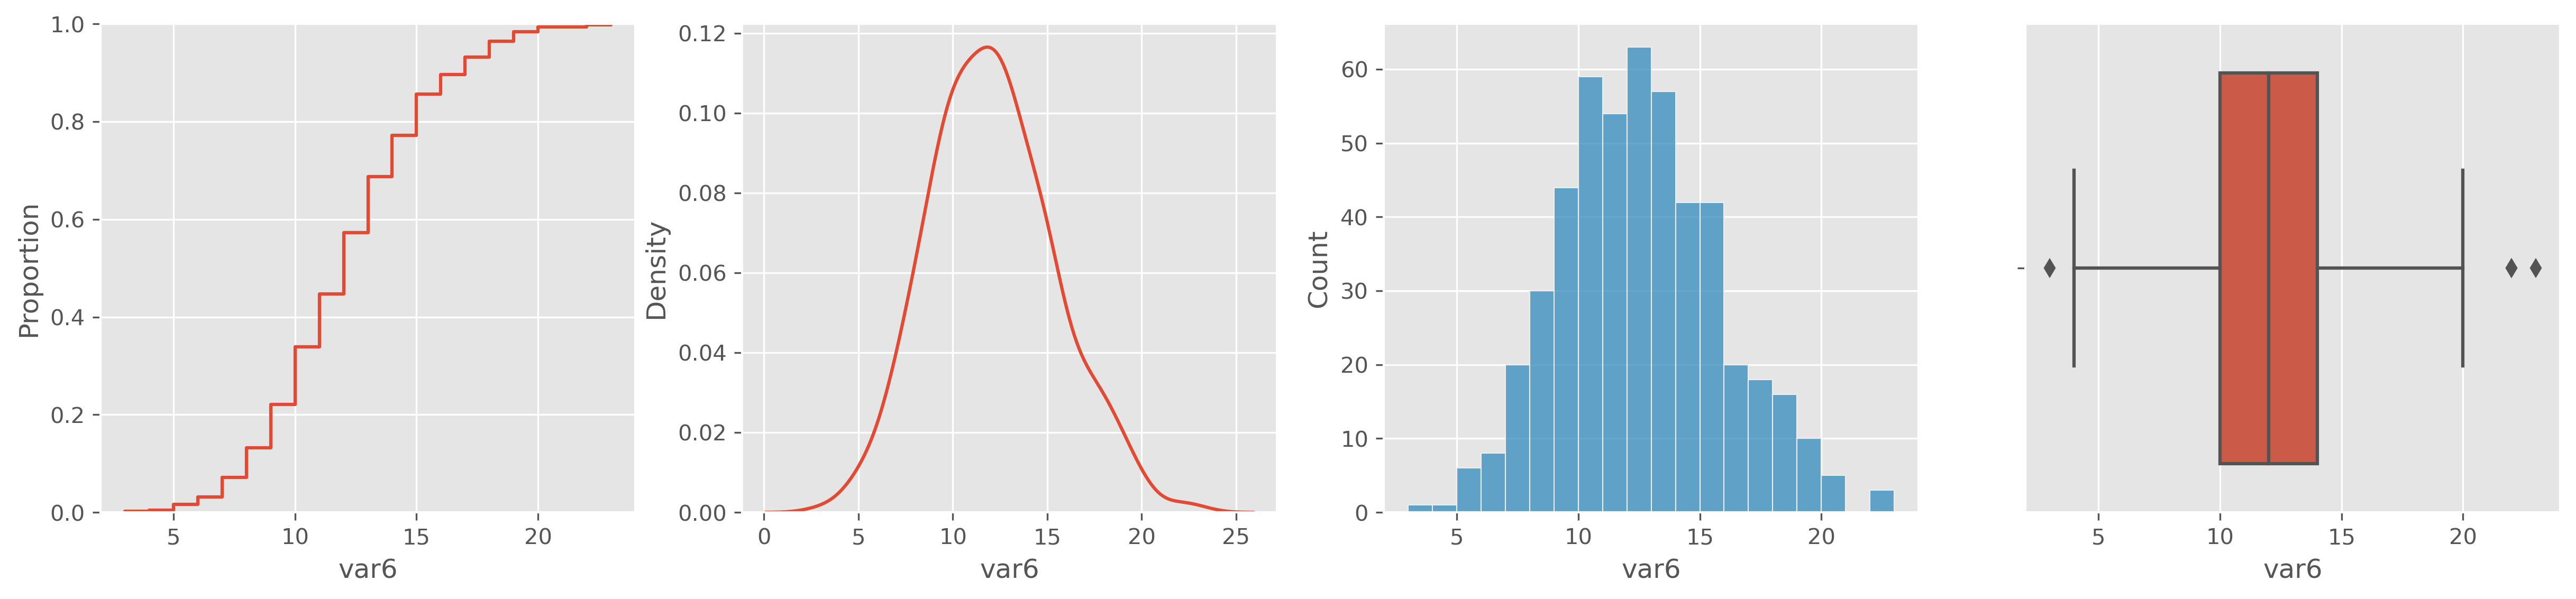

In [577]:
fig, axs = plt.subplots(1, 4, sharex=False, figsize=(20, 4), dpi=300)

sns.ecdfplot(x=df['var6'], ax=axs[0])
sns.kdeplot(x=df['var6'], ax=axs[1])
sns.histplot(x=df['var6'], ax=axs[2])
sns.boxplot(x=df['var6'], ax=axs[3])